In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [3]:
stop_words = stopwords.words('english')

In [4]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [5]:
max_len_negative

1400

In [7]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [8]:
max_len_positive

1693

In [9]:
max_len = max(max_len_negative, max_len_positive)

In [10]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [11]:
X_train = negative_documents[:800] + positive_documents[:800]

In [12]:
len(X_train)

1600

In [13]:
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]

In [14]:
len(y_train)

1600

In [15]:
X_test = negative_documents[800:] + positive_documents[800:]
len(X_test)

400

In [16]:
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [18]:
max_len

1693

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [20]:
import pickle
with open('tokenizer.h5', 'wb') as f:
    pickle.dump(tokenizer, f)

In [21]:
tokenizer

In [22]:
vocab_len = len(tokenizer.word_index) + 1

In [23]:
vocab_len

40221

In [24]:
encoded = tokenizer.texts_to_sequences(X_train)

In [25]:
encoded[0]

[28,
 47,
 653,
 287,
 66,
 2046,
 272,
 267,
 4413,
 184,
 23671,
 38,
 528,
 1438,
 12,
 47,
 2521,
 6909,
 3429,
 5265,
 1500,
 389,
 2,
 330,
 11,
 28,
 1,
 2047,
 1594,
 38,
 260,
 52,
 2,
 4,
 2,
 52,
 502,
 2,
 7879,
 9,
 67,
 989,
 455,
 1246,
 14,
 131,
 66,
 4228,
 5,
 10166,
 2662,
 1,
 47,
 8494,
 8494,
 6910,
 105,
 1670,
 479,
 1701,
 710,
 7363,
 5826,
 873,
 77,
 710,
 873,
 27,
 1164,
 23672,
 317,
 5827,
 380,
 10167,
 2599,
 6911,
 24,
 184,
 336,
 160,
 1044,
 982,
 516,
 11302,
 3772,
 73,
 3524,
 815,
 3232,
 8495,
 46,
 402,
 1,
 517,
 93,
 5,
 2456,
 6170,
 2205,
 199,
 294,
 213,
 73,
 1818,
 441,
 10168,
 6912,
 35,
 108,
 282,
 3329,
 1072,
 1246,
 637,
 5266,
 339,
 3,
 5018,
 169,
 6543,
 332,
 1964,
 2600,
 6,
 139,
 1,
 6913,
 2,
 6,
 130,
 2130,
 53,
 137,
 203,
 1547,
 33,
 692,
 3,
 1702,
 1594,
 3909,
 8496,
 1004,
 1860,
 200,
 17,
 561,
 186,
 806,
 9239,
 3430,
 17,
 3233,
 161,
 261,
 1413,
 73,
 225,
 1,
 12826,
 654,
 718,
 4413,
 34,
 1155,
 15

In [26]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [27]:
padded.shape

(1600, 1693)

In [28]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

input2 = Input(shape=(max_len,))
embedding2 = Embedding(vocab_len, 100)(input2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPool1D(pool_size=2)(drop2)
flat2= Flatten()(pool2)

input3 = Input(shape=(max_len,))
embedding3 = Embedding(vocab_len, 100)(input3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPool1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

input4 = Input(shape=(max_len,))
embedding4 = Embedding(vocab_len, 100)(input4)
conv4 = Conv1D(filters=32, kernel_size=10, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPool1D(pool_size=2)(drop4)
flat4 = Flatten()(pool4)

conc = concatenate([flat1, flat2, flat3, flat4])

dense1 = Dense(10, activation='relu')(conc)
output = Dense(1, activation='sigmoid')(dense1)

In [29]:
model = Model(inputs=[input1, input2, input3, input4], outputs=output)

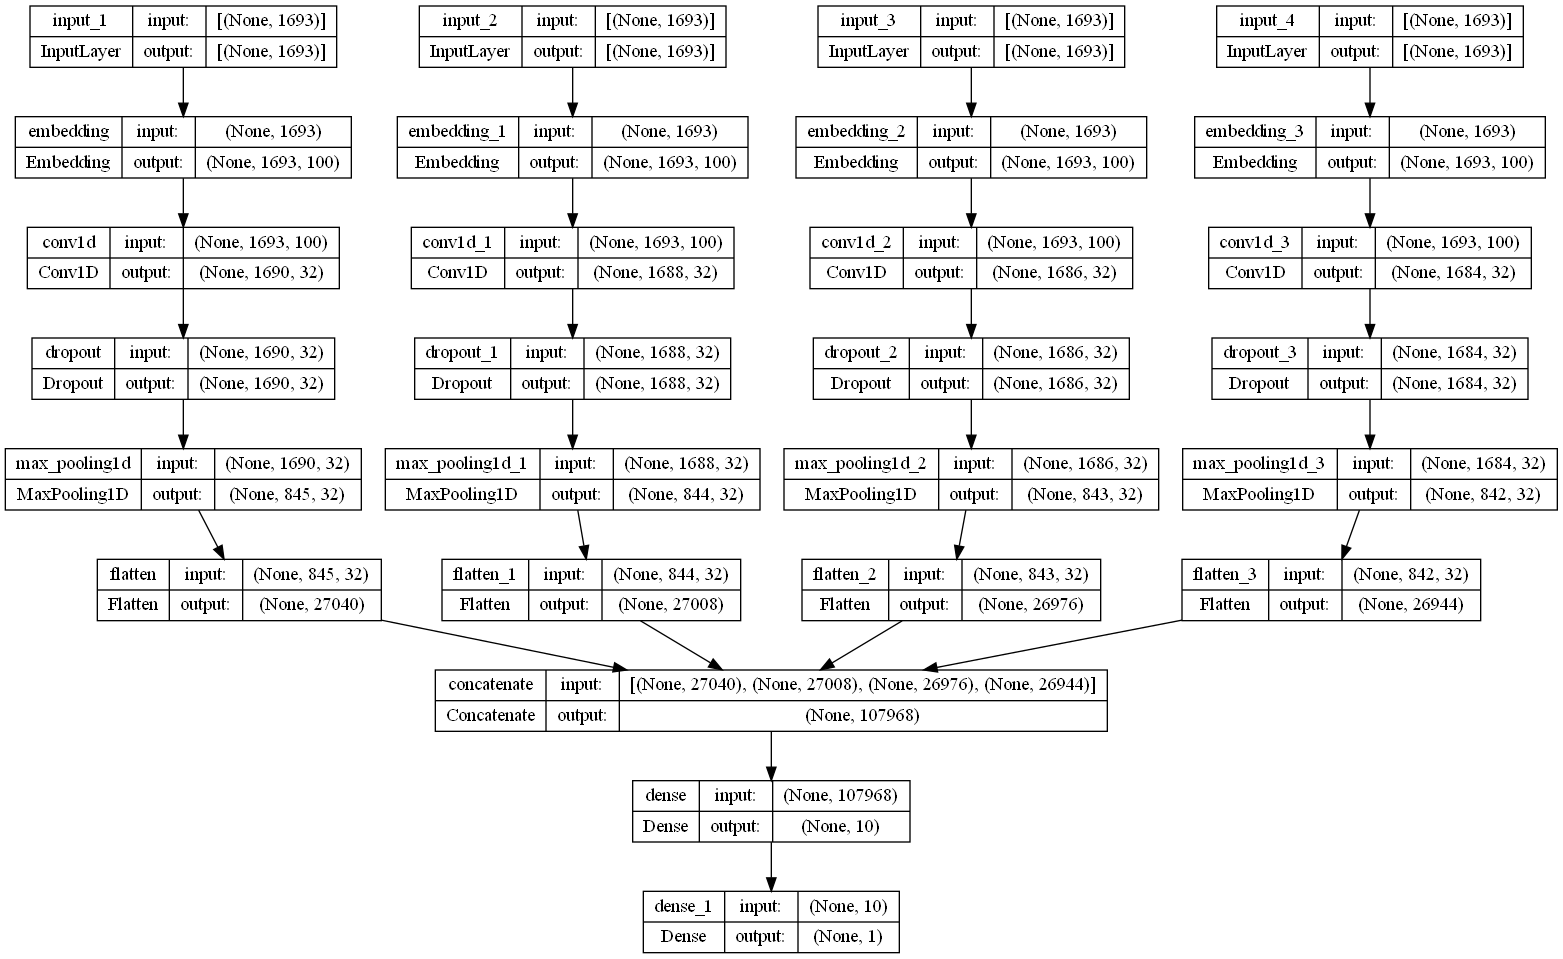

In [30]:
plot_model(model, show_shapes=True)

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1693)]       0           []                               
                                                                                              

In [33]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [34]:
padded_test.shape

(400, 1693)

In [35]:
import numpy as np

In [36]:
model.fit([padded, padded, padded, padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test, padded_test, padded_test, padded_test], np.array(y_test)))

Epoch 1/10
80/80 [==============================] - 29s 354ms/step - loss: 0.7057 - accuracy: 0.5294 - val_loss: 0.6756 - val_accuracy: 0.5975
Epoch 2/10
80/80 [==============================] - 27s 341ms/step - loss: 0.2274 - accuracy: 0.9669 - val_loss: 0.4975 - val_accuracy: 0.7750
Epoch 3/10
80/80 [==============================] - 27s 340ms/step - loss: 0.0120 - accuracy: 0.9994 - val_loss: 0.4724 - val_accuracy: 0.7825
Epoch 4/10
80/80 [==============================] - 27s 342ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4598 - val_accuracy: 0.7850
Epoch 5/10
80/80 [==============================] - 29s 364ms/step - loss: 5.8592e-04 - accuracy: 1.0000 - val_loss: 0.4628 - val_accuracy: 0.7875
Epoch 6/10
80/80 [==============================] - 28s 352ms/step - loss: 3.2047e-04 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.7975
Epoch 7/10
80/80 [==============================] - 28s 349ms/step - loss: 2.1950e-04 - accuracy: 1.0000 - val_loss: 0.4666 - val_accu

In [37]:
model.save('textcnn.h5')

In [38]:
from tensorflow.keras.models import load_model

In [39]:
model = load_model('textcnn.h5')

In [40]:
with open('tokenizer.h5', 'rb') as f:
    tokenizer = pickle.load(f)

In [41]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'good': 7,
 'would': 8,
 'time': 9,
 'story': 10,
 'much': 11,
 'also': 12,
 'character': 13,
 'characters': 14,
 'get': 15,
 'two': 16,
 'see': 17,
 'first': 18,
 'well': 19,
 'could': 20,
 'way': 21,
 'make': 22,
 'really': 23,
 'films': 24,
 'little': 25,
 'life': 26,
 'people': 27,
 'plot': 28,
 'scene': 29,
 'bad': 30,
 'never': 31,
 'best': 32,
 'man': 33,
 'many': 34,
 'scenes': 35,
 'new': 36,
 'know': 37,
 'movies': 38,
 'great': 39,
 'another': 40,
 'love': 41,
 'director': 42,
 'go': 43,
 'action': 44,
 'us': 45,
 'end': 46,
 'something': 47,
 'still': 48,
 'back': 49,
 'world': 50,
 'seems': 51,
 'work': 52,
 'however': 53,
 'made': 54,
 'makes': 55,
 'every': 56,
 'though': 57,
 'audience': 58,
 'better': 59,
 'performance': 60,
 'big': 61,
 'enough': 62,
 'seen': 63,
 'take': 64,
 'role': 65,
 'going': 66,
 'around': 67,
 'gets': 68,
 'last': 69,
 'may': 70,
 'real': 71,
 'think': 72,
 'funny': 73,
 'y

In [42]:
txt = '''
boy , what a great movie ! ! 
keanu reeves and morgan freeman acting together , the director of the fugitive ( andrew davis ) back again to give us another thriller , and the beautiful rachel stealing beauty weisz thrown in to boot . 
how could this not be a blockbuster ? 
all die-hard keanu reeves fans , read on . 
ol " much ado about nothing " plays eddie kasalivich , a machinist studying at the university of chicago . 
to help pay for the rent , he takes on this job making the machinery for a hydrogen project being conducted by the university . 
by happy coincidence , he also happens to stumble on the solution to the final problem and thus is the only one who knows the key to performing this feat of miracle physics . 
this project holds great promise : taking hydrogen from water and giving out more energy than is put in . 
a potential solution to the earth's energy problems without the pollution cost . 
surely nobody could have any problems with that ? 
morgan freeman is paul shannon , the project's sponsor . 
he works for a very powerful organization that disagrees with the paternal project leader as to how quickly technology should be released to the public . 
he figures the world will disintegrate into anarchy if the results of the project are released too quickly . 
so he murders the project leader , blows up the project ( great but short scene here , sort of like a mini id4 city-devastation thing ) and tries to simulate the experiment at some other hi-tech hush-hush location . 
unfortunately , our intrepid machinist and an english physicist ( weisz ) manage to get away and now follows a fugitive-like chase using a not too dissimilar rehash of that movie script . 
this movie is just dying for a comparison with " the fugitive " . 
both movies use chicago as the main city and since the place doesn't change much , i guess we can't really blame the setting for the paucity of atmosphere . 
the trouble here is that where the fugitive had harrison ford and tommy lee jones , chain reaction only has keanu reeves and fred ward . 
credit to them , but we aren't really given much of a chance to empathise with the characters . 
where ford was able to work within the confines of the movie to evoke sympathy , eddie kasalivich just doesn9t seem very believeable and reeves' character is never given the time to develop . 
it might have been a better investment in film to give the characters more depth and spend less time on the chase sequences , which frankly , get quite boring after a while . 
harrison ford was " the man against the world . " 
he was alone in a world where he didn't know who to trust and it came across real well . 
in chain reaction , keanu reeves isn't alone . 
now that would be fine if the fleeing couple had some chemistry and could really portray some paranoia , vulnerability and confusion . 
we don't get this . 
we get him thinking he's still in speed , only now our sandra bullock has an english accent , probably doesn't drive a bus , and hardly contributes anything to the movie . 
the producers here probably thought , " hey , what if keanu and rachel don't hit it off too well ? 
let's rope in that morgan to help us out . " 
well , keanu and rachel didn't hit it off well on the screen , and most unfortunately , morgan freeman doesn't help much either . 
the only thing we come to really know of paul shannon is that he always has a full load of cigars in his cigar holder . 
it's not really his fault . 
once again , andrew davis just doesn't take the time to build his characters . 
someone must have convinced him that this time round , cinema dollars are best earned by making the movie run like a headless chicken . 
the flying inkpot rating system : * wait for the tv2 broadcast . 
 * * a little creaky , but still better than staying at home with gotcha ! 
 * * * pretty good , bring a friend . 
 * * * * amazing , potent stuff . 
 * * * * * perfection . 
see it twice . 
'''

In [43]:
encoded_txt = tokenizer.texts_to_sequences([txt])
padded_txt = pad_sequences(encoded_txt, maxlen=max_len, padding='post')

In [44]:
padded_txt.shape

(1, 1693)

In [45]:
model.predict([padded_txt, padded_txt, padded_txt, padded_txt])

1/1 [==============================] - 0s 157ms/step


array([[0.00296455]], dtype=float32)

In [46]:
model.predict([padded_txt, padded_txt, padded_txt, padded_txt])[0][0]

1/1 [==============================] - 0s 25ms/step


0.0029645478

In [47]:
if (model.predict([padded_txt, padded_txt, padded_txt, padded_txt])[0][0] < 0.5):
    print('negative')
else:
    print('positive')

1/1 [==============================] - 0s 25ms/step
negative


In [48]:
# MasoudKaviani.ir